In [1]:
import pandas as pd
import requests
import openpyxl

### Part 1. Vaccinations and cases in Russia per region

In [2]:
# READ IN the vsccinations data from html
df_vac = pd.read_html('https://gogov.ru/articles/covid-v-stats')

In [3]:
#FIND the right table
df_vac[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   регион                       85 non-null     object 
 1   привито, чел.                85 non-null     object 
 2   % от насе-ления              85 non-null     float64
 3   средний темп, чел./день      85 non-null     object 
 4   средний темп к нас., %       85 non-null     float64
 5   дней до вакц. 50% нас.       85 non-null     int64  
 6   привито двумя комп., чел.    85 non-null     object 
 7   обнов-лено                   85 non-null     float64
 8   2 комп./1 комп.              85 non-null     object 
 9   Измене-ние средн. темпа ***  85 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.8+ KB


In [4]:
#REWRITE as df_regions
dr_vac = df_vac[0]

In [5]:
#TRANSLATE the column names
dr_vac.columns=['region', 'total_vac', '%_of_pop', 'pace_p_p_d', 'pace_%_pop', 'days_50%', 'both_people', 'upd', '2/1', 'pace_chng'] 

In [6]:
#SORT 5 regions with the HIGHEST % of vaccinated population 
dr_vac.sort_values(by='%_of_pop', ascending=False).head(5)

,region,total_vac,%_of_pop,pace_p_p_d,pace_%_pop,days_50%,both_people,upd,2/1,pace_chng
83,Чукотский АО,17 000,34.32,225,0.45,35,13 600,6.07,80%,106%
10,Белгородская обл.,520 536,33.77,7 862,0.51,32,352 816,8.07,68%,-7%
1,Московская обл.,2 000 000,25.95,62 633,0.81,30,1 100 000,8.07,55%,59%
44,Мордовия,201 738,25.90,2 825,0.36,66,149 569,8.07,74%,12%
84,Ненецкий АО,11 403,25.69,111,0.25,97,9 562,8.07,84%,13%


In [7]:
#SORT 5 regions with the LOWEST % of vaccinated population 
dr_vac.sort_values(by='%_of_pop', ascending=False).tail(5)

,region,total_vac,%_of_pop,pace_p_p_d,pace_%_pop,days_50%,both_people,upd,2/1,pace_chng
58,Владимирская обл.,149 000,11.10,2 165,0.16,241,112 000,6.07,75%,30%
74,Северная Осетия,76 203,10.99,1 458,0.21,185,46 859,7.07,61%,14%
77,Адыгея,50 717,10.95,1 197,0.26,151,32 000,2.07,63%,40%
72,Кабардино-Балкария,78 930,9.08,1 562,0.18,228,43 284,7.07,55%,-19%
50,Дагестан,177 807,5.67,3 722,0.12,373,94 703,9.07,53%,51%


In [8]:
# READ IN the data on cases using read_html 
df_cases = pd.read_html('https://gogov.ru/articles/covid-19')

In [9]:
#FIND the right table
df_cases[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Регион         85 non-null     object 
 1   Всего случаев  85 non-null     object 
 2   за сутки       85 non-null     object 
 3   Коэф. распр.   85 non-null     float64
 4   Умерло         85 non-null     object 
 5   за сутки.1     74 non-null     float64
 6   Смерт-ность    85 non-null     object 
 7   Выздор.        85 non-null     object 
dtypes: float64(2), object(6)
memory usage: 5.4+ KB


In [10]:
#REWRITE as df_regions
df_cases = df_cases[0]

In [11]:
#TRANSLATE the column names
df_cases.columns=['region', 'total_cases', 'new_cases', 'distr', 'total_dead', 'new_dead', 'mortality', 'recov'] 

In [12]:
#SORT 5 regions with the HIGHEST % of mortality 
df_cases.sort_values(by='mortality', ascending=False).head(10)

,region,total_cases,new_cases,distr,total_dead,new_dead,mortality,recov
21,Краснодарский край,53 534,+212,1.04,3 595,23.0,6.7%,45 825
61,Чувашия,27 766,+62,1.00,1 593,6.0,5.7%,25 374
38,Тульская обл.,43 997,+151,0.99,2 271,9.0,5.2%,39 767
7,Красноярский край,80 186,+385,1.24,4 034,11.0,5%,71 165
4,Ростовская обл.,101 467,+296,1.14,4 756,18.0,4.7%,91 239
19,Алтайский край,56 006,+219,1.07,2 540,14.0,4.5%,47 439
14,Пермский край,63 785,+354,1.20,2 785,11.0,4.4%,56 780
32,Новосибирская обл.,48 244,+189,1.04,2 127,8.0,4.4%,42 400
73,Севастополь,17 561,+115,1.00,768,4.0,4.4%,15 282
53,Дагестан,37 167,+183,1.06,1 569,3.0,4.2%,33 536


In [13]:
df_cases.sort_values(by='mortality', ascending=False).tail(10)

,region,total_cases,new_cases,distr,total_dead,new_dead,mortality,recov
76,Ингушетия,16 441,+37,1.28,197,NaN,1.2%,15 778
44,Ямало-Ненецкий АО,40 830,+101,1.17,436,1.0,1.1%,39 092
49,Калужская обл.,38 163,+110,1.11,396,4.0,1%,36 344
71,Карачаево-Черкесия,21 144,+41,1.40,199,3.0,0.9%,20 416
18,Хабаровский край,57 910,+312,1.07,521,8.0,0.9%,53 690
84,Чукотский АО,880,+10,0.71,8,NaN,0.9%,765
33,Кировская обл.,47 653,+108,0.96,399,1.0,0.8%,45 013
83,Ненецкий АО,1 280,+13,1.08,10,NaN,0.8%,1 172
59,Новгородская обл.,32 962,+121,1.33,187,NaN,0.6%,31 887
64,Сахалинская обл.,25 179,+79,1.01,73,NaN,0.3%,23 939


### Part 2. Global data on vaccinations from Our World in Data

In [14]:
#Sources:
#Our world in data
#https://ourworldindata.org/covid-vaccinations
#https://github.com/owid/covid-19-data/tree/master/public/data

#References:
#https://graphics.reuters.com/world-coronavirus-tracker-and-maps/vaccination-rollout-and-access/
#https://www.nytimes.com/interactive/2021/06/23/world/asia/japan-coronavirus-olympics.html

In [15]:
df = pd.read_csv('owid-covid-data.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100920 entries, 0 to 100919
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               100920 non-null  object 
 1   continent                              96197 non-null   object 
 2   location                               100920 non-null  object 
 3   date                                   100920 non-null  object 
 4   total_cases                            97187 non-null   float64
 5   new_cases                              97184 non-null   float64
 6   new_cases_smoothed                     96174 non-null   float64
 7   total_deaths                           87013 non-null   float64
 8   new_deaths                             87169 non-null   float64
 9   new_deaths_smoothed                    96174 non-null   float64
 10  total_cases_per_million                96670 non-null   

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df = df.dropna(subset=['people_fully_vaccinated_per_hundred'])

In [19]:
df[df['date'] == '2021-07-07'].sort_values(by='people_fully_vaccinated_per_hundred', ascending=False).head(10)['location']

17509          Cayman Islands
41733                 Iceland
95113    United Arab Emirates
45440                  Israel
7790                  Bahrain
4756                    Aruba
44936             Isle of Man
60908                Mongolia
96652                 Uruguay
41236                 Hungary
Name: location, dtype: object

In [20]:
df[df['date'] == '2021-07-07'].sort_values(by='people_fully_vaccinated_per_hundred', ascending=False).tail(10)['location']

69887        Pakistan
1010           Africa
27428           Egypt
48550           Kenya
83905    South Africa
499       Afghanistan
58242      Mauritania
98874         Vietnam
89449          Taiwan
18465            Chad
Name: location, dtype: object

In [21]:
df_day = df[df['date'] == '2021-07-07']

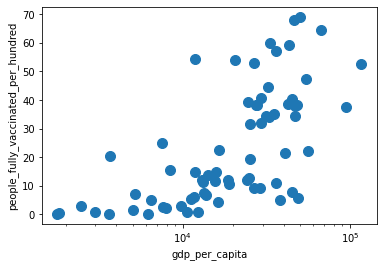

In [22]:
df_day.plot.scatter(x = 'gdp_per_capita', y = 'people_fully_vaccinated_per_hundred', s = 100, logx=True)

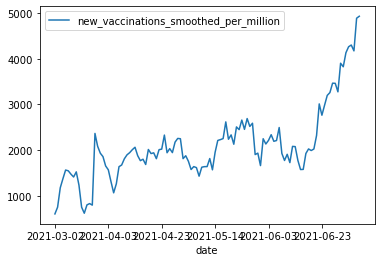

In [23]:
df[(df['location']=='Russia')].plot.line(x='date', y='new_vaccinations_smoothed_per_million')

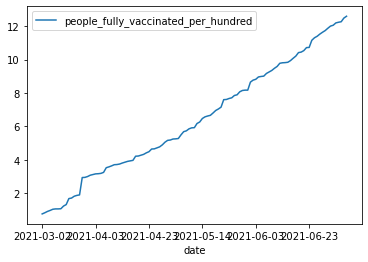

In [24]:
df[(df['location']=='Russia')].plot.line(x='date', y='people_fully_vaccinated_per_hundred')


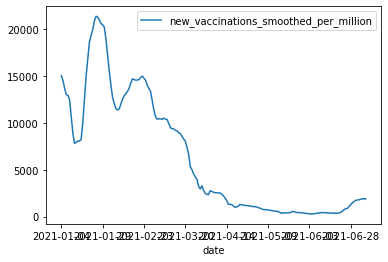

In [25]:
df[df['location']=='Israel'].plot.line(x='date', y='new_vaccinations_smoothed_per_million')

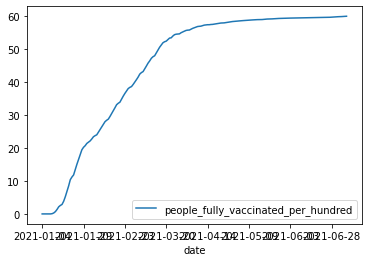

In [26]:
df[df['location']=='Israel'].plot.line(x='date', y='people_fully_vaccinated_per_hundred')

### Part 3. Merge with income classification from World Bank

In [27]:
#Source:
#https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups#:~:text=%EF%BB%BF%EF%BB%BF%20For%20the%20current,those%20with%20a%20GNI%20per

In [28]:
income=pd.read_excel("wb_income.xlsx")

In [29]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Economy              264 non-null    object
 1   Code                 264 non-null    object
 2   Region               218 non-null    object
 3   Income group         217 non-null    object
 4   Lending category     144 non-null    object
 5   Other (EMU or HIPC)  58 non-null     object
dtypes: object(6)
memory usage: 12.5+ KB


In [30]:
df_all = df.merge(income.add_prefix("wb"), left_on='iso_code', right_on='wbCode')

In [33]:
df_all = df_all.rename(columns={'wbIncome group': 'wbIncome_group'})

In [34]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12107 entries, 0 to 12106
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               12107 non-null  object 
 1   continent                              12107 non-null  object 
 2   location                               12107 non-null  object 
 3   date                                   12107 non-null  object 
 4   total_cases                            11379 non-null  float64
 5   new_cases                              11378 non-null  float64
 6   new_cases_smoothed                     11379 non-null  float64
 7   total_deaths                           11325 non-null  float64
 8   new_deaths                             11325 non-null  float64
 9   new_deaths_smoothed                    11379 non-null  float64
 10  total_cases_per_million                11379 non-null  float64
 11  ne

In [35]:
df_1day = df_all[df_all['date'] == '2021-07-06']

In [36]:
df_1day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 61 to 12106
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               99 non-null     object 
 1   continent                              99 non-null     object 
 2   location                               99 non-null     object 
 3   date                                   99 non-null     object 
 4   total_cases                            92 non-null     float64
 5   new_cases                              92 non-null     float64
 6   new_cases_smoothed                     92 non-null     float64
 7   total_deaths                           91 non-null     float64
 8   new_deaths                             91 non-null     float64
 9   new_deaths_smoothed                    92 non-null     float64
 10  total_cases_per_million                92 non-null     float64
 11  new_

In [38]:
df_1day['wbIncome_group'].unique()

array(['Upper middle income', 'High income', 'Lower middle income',
       'Low income'], dtype=object)

In [39]:
df_1day.replace(['High income', 'Upper middle income', 'Lower middle income', 'Low income'], ['1_High income','2_Upper middle income', '3_Lower middle income','4_Low income'])

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,wbEconomy,wbCode,wbRegion,wbIncome_group,wbLending category,wbOther (EMU or HIPC)
61,ALB,Europe,Albania,2021-07-06,132544.0,7.0,4.286,2456.0,0.0,0.000,46057.405,2.432,1.489,853.430,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000063.0,576905.0,423158.0,5982.0,6366.0,34.75,20.05,14.70,2212.0,NaN,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN,Albania,ALB,Europe & Central Asia,2_Upper middle income,IBRD,NaN
107,ATG,North America,Antigua and Barbuda,2021-07-06,1265.0,1.0,0.286,42.0,0.0,0.000,12917.654,10.212,2.918,428.887,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64823.0,36749.0,28074.0,NaN,118.0,66.19,37.53,28.67,1205.0,NaN,97928.0,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778,NaN,Antigua and Barbuda,ATG,Latin America & Caribbean,1_High income,IBRD,NaN
271,ARG,South America,Argentina,2021-07-06,4574340.0,21590.0,18091.286,96983.0,462.0,473.571,101211.669,477.699,400.287,2145.842,10.222,10.478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22813398.0,18246811.0,4566587.0,369269.0,370243.0,50.48,40.37,10.10,8192.0,NaN,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN,Argentina,ARG,Latin America & Caribbean,2_Upper middle income,IBRD,NaN
349,ABW,North America,Aruba,2021-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129162.0,68478.0,60684.0,587.0,396.0,120.98,64.14,56.84,3709.0,NaN,106766.0,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN,Aruba,ABW,Latin America & Caribbean,1_High income,NaN,NaN
387,AUS,Oceania,Australia,2021-07-06,30861.0,30.0,37.000,910.0,0.0,0.000,1210.241,1.176,1.451,35.686,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92197.0,21450495.0,841.2,3.616,130874.0,5.132,0.000,3537.1,tests performed,8402191.0,6457966.0,1944225.0,146718.0,128784.0,32.95,25.33,7.62,5050.0,NaN,25499881.0,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944,NaN,Australia,AUS,East Asia & Pacific,1_High income,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11654,GBR,Europe,United Kingdom,2021-07-06,4975903.0,28629.0,26325.000,128532.0,37.0,20.286,73297.922,421.722,387.782,1893.351,0.545,0.299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79541794.0,45514492.0,34027302.0,238937.0,278512.0,117.17,67.05,50.12,4103.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39

In [41]:
df_1day.to_csv('6July.csv')